<a href="https://colab.research.google.com/github/Thomas-George-T/Appliance-Energy-Prediction/blob/main/Thomas_ML_Group_11_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
# import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

In [ ]:
# Downloading othe dataset
!wget -O energydata_complete.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2023-04-07 18:53:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11979363 (11M) [application/x-httpd-php]
Saving to: ‘energydata_complete.csv’

energydata_complete 100%[===================>]  11.42M  22.4MB/s    in 0.5s    

2023-04-07 18:53:36 (22.4 MB/s) - ‘energydata_complete.csv’ saved [11979363/11979363]



In [ ]:
data = pd.read_csv('energydata_complete.csv')

In [ ]:
print(data.head())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [ ]:
print(data.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [ ]:
print(data.describe())


         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [ ]:
# convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# extract the month, weekday, hour, and week columns
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday
data['hour'] = data['date'].dt.hour
data['week'] = data['date'].dt.isocalendar().week
data['day_of_week'] = data['date'].dt.day_name()
data['week_of_month'] = (data['date'].dt.day-1) // 7 + 1

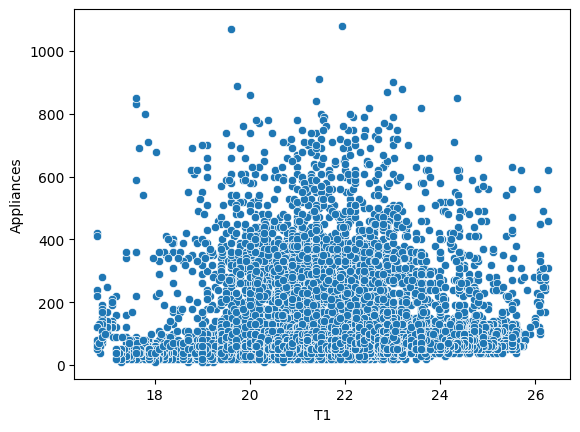

In [ ]:
# Explore the relationship between features and target variable: 
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='T1', y='Appliances', data=data)
plt.show()


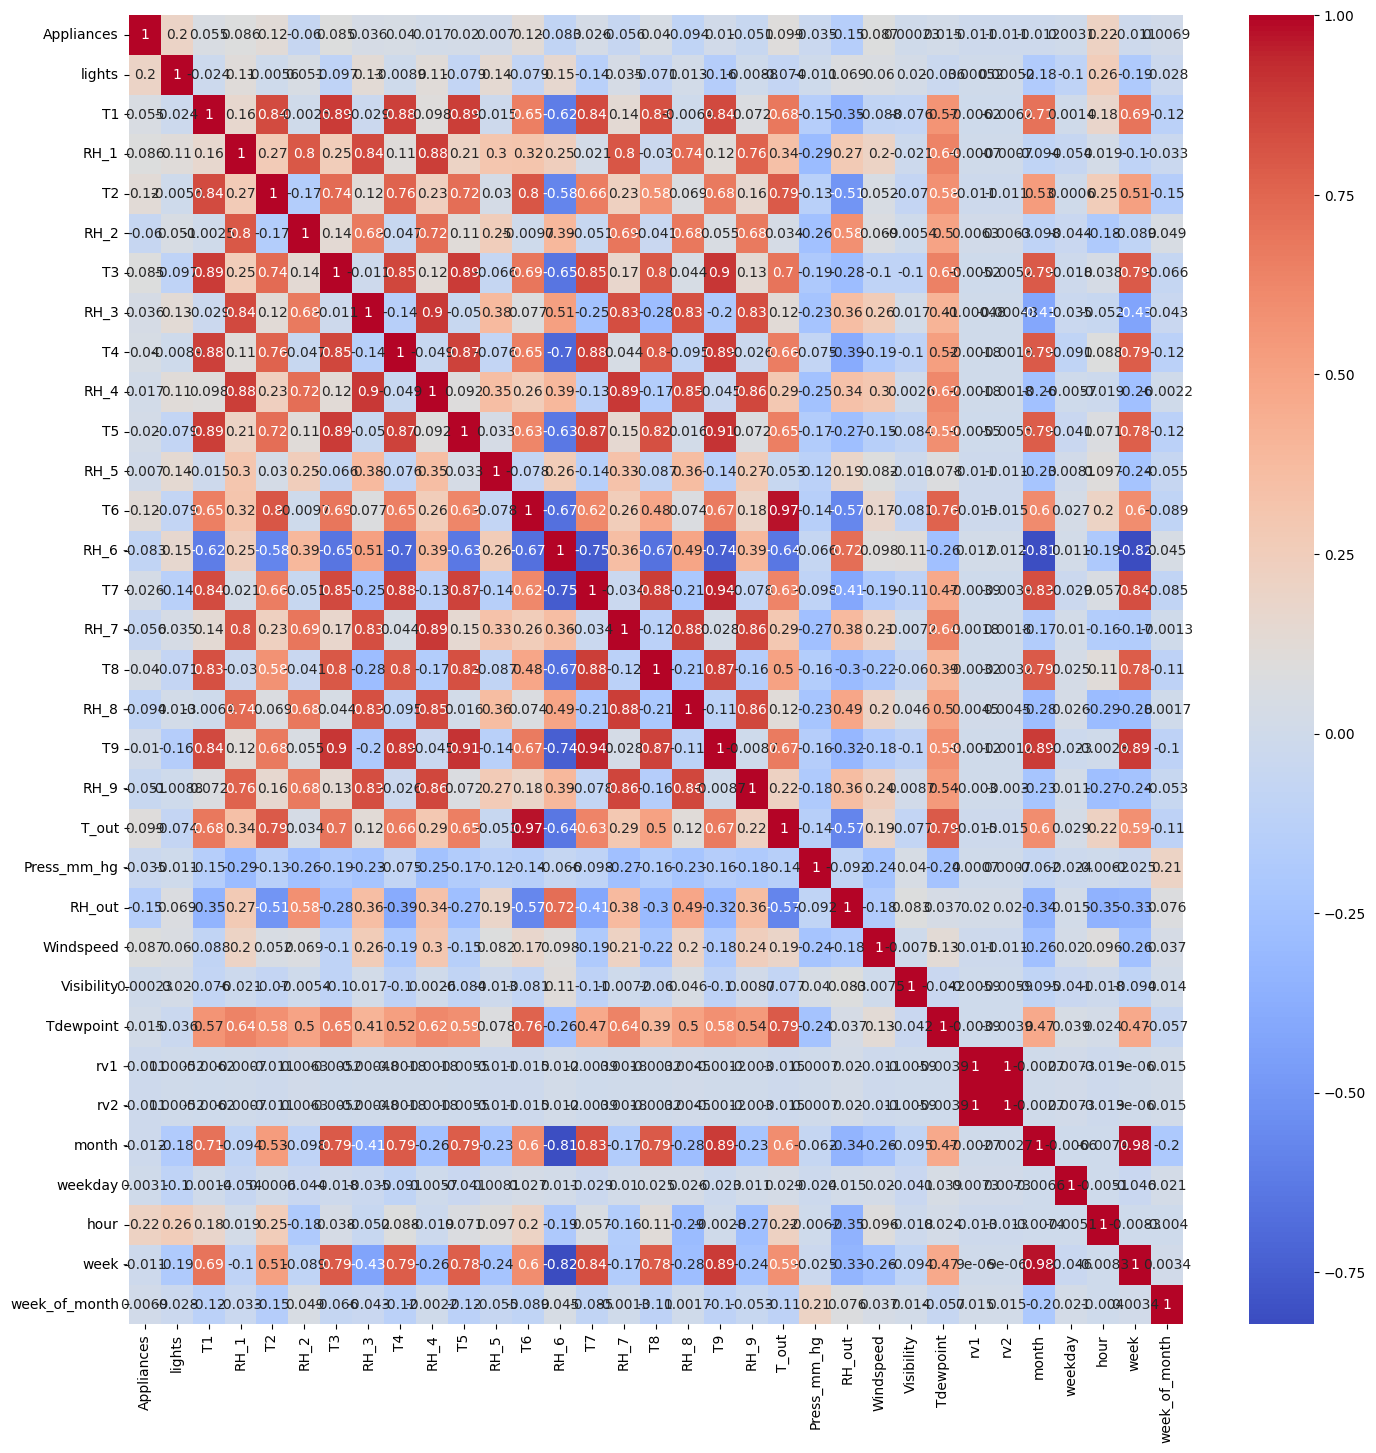

In [ ]:
# Explore the relationship between features: 

# compute the correlation matrix
corr_matrix = data.corr()

# create the heatmap with a larger size
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()


In [ ]:
print(data.dtypes)


date             datetime64[ns]
Appliances                int64
lights                    int64
T1                      float64
RH_1                    float64
T2                      float64
RH_2                    float64
T3                      float64
RH_3                    float64
T4                      float64
RH_4                    float64
T5                      float64
RH_5                    float64
T6                      float64
RH_6                    float64
T7                      float64
RH_7                    float64
T8                      float64
RH_8                    float64
T9                      float64
RH_9                    float64
T_out                   float64
Press_mm_hg             float64
RH_out                  float64
Windspeed               float64
Visibility              float64
Tdewpoint               float64
rv1                     float64
rv2                     float64
month                     int64
weekday                   int64
hour    

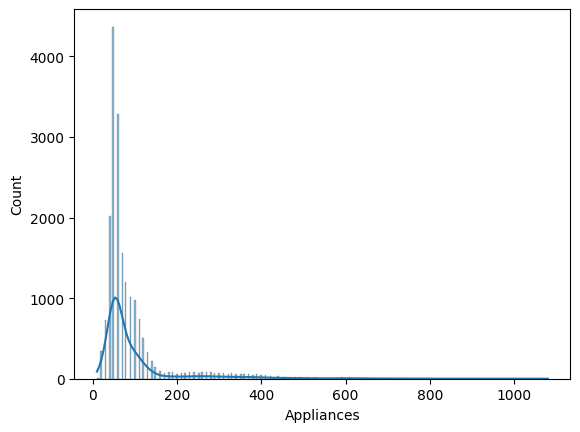

In [ ]:
# Visualize the distribution of the target variable:
sns.histplot(data['Appliances'], kde=True)
plt.show()


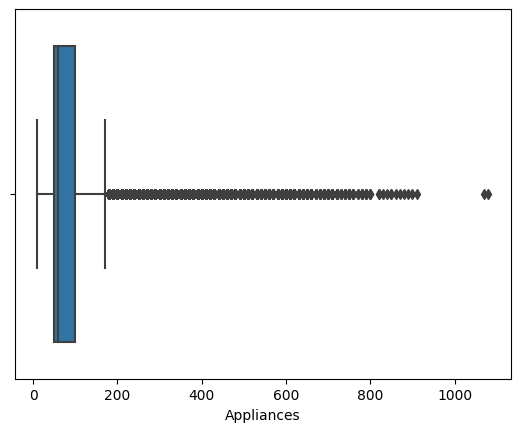

In [ ]:
# Check for outliers:
sns.boxplot(x='Appliances', data=data)
plt.show()


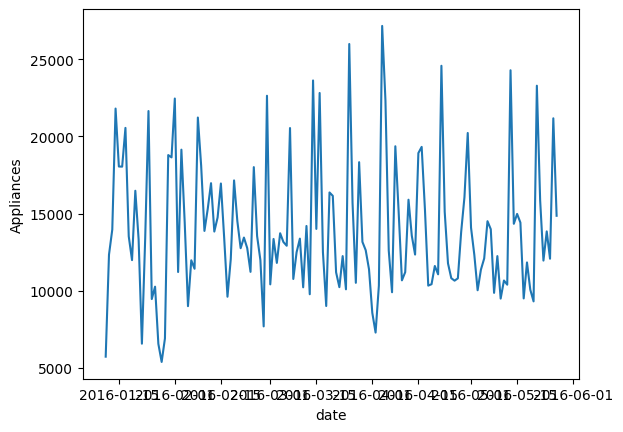

In [ ]:
# Explore time-based patterns:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
sns.lineplot(data=data.resample('D').sum(), x=data.resample('D').sum().index, y='Appliances')
plt.show()


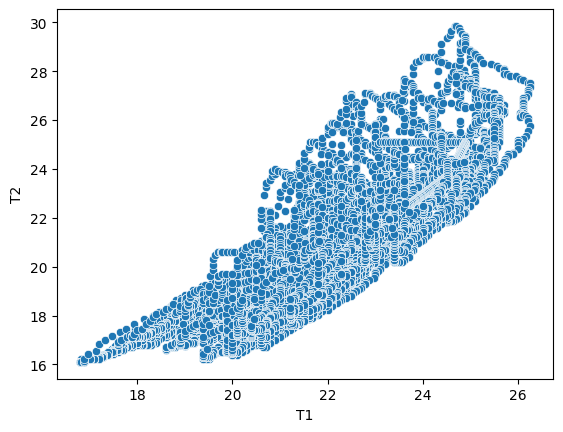

In [ ]:
# Explore feature interactions:
sns.scatterplot(x='T1', y='T2', data=data)
plt.show()


In [ ]:
cat_cols = [col for col in data.columns if data[col].nunique() < 10]
print(cat_cols)


['lights', 'month', 'weekday', 'day_of_week', 'week_of_month']


Text(0, 0.5, 'Mean Energy Consumption')

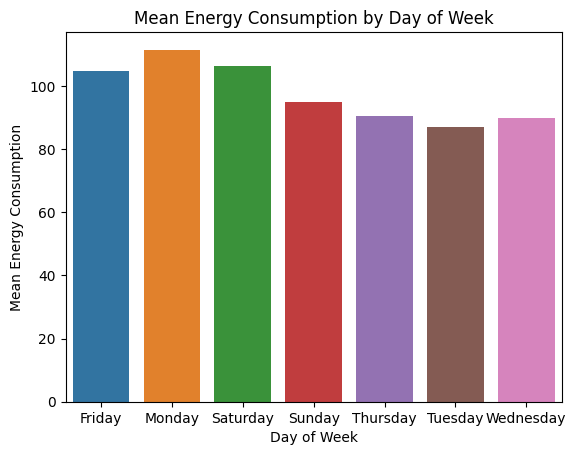

In [ ]:
# # Convert the date column to datetime format
# data['date'] = pd.to_datetime(data['date'])

# # Add a new column for day of the week
# data['day_of_week'] = data['date'].dt.day_name()

# Group by day of the week and calculate mean energy consumption
mean_energy = data.groupby('day_of_week')['Appliances'].mean()

# Create a bar plot using seaborn
sns.barplot(x=mean_energy.index, y=mean_energy.values)

# Set the plot title and axis labels
plt.title('Mean Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Mean Energy Consumption')

Text(0, 0.5, 'Mean Energy Consumption')

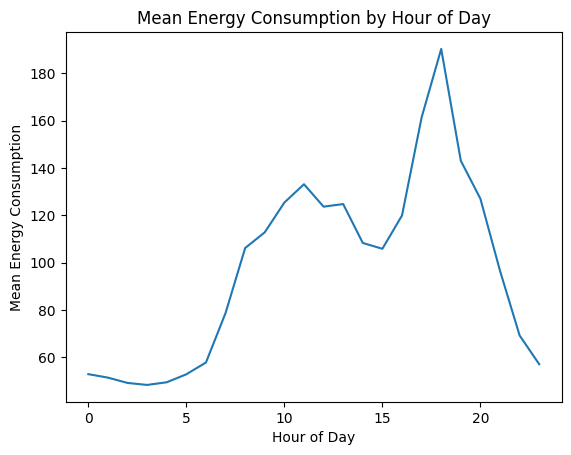

In [ ]:
# Group by hour of the day and calculate mean energy consumption
mean_energy = data.groupby('hour')['Appliances'].mean()

# Create a line plot using seaborn
sns.lineplot(x=mean_energy.index, y=mean_energy.values)

# Set the plot title and axis labels
plt.title('Mean Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Energy Consumption')

Text(50.72222222222221, 0.5, 'Day of Week')

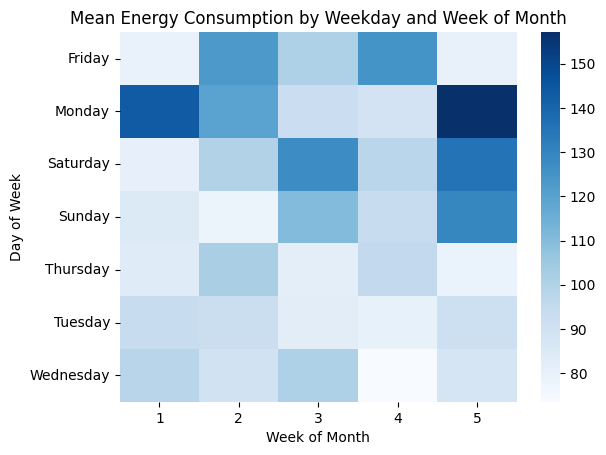

In [ ]:
# Group by weekday and week of the month, and calculate mean energy consumption
mean_energy = data.groupby(['day_of_week', 'week_of_month'])['Appliances'].mean()

# Create a pivot table from the mean energy consumption values
energy_pivot = mean_energy.unstack()

# Create a heatmap using seaborn
sns.heatmap(energy_pivot, cmap='Blues')

# Set the plot title and axis labels
plt.title('Mean Energy Consumption by Weekday and Week of Month')
plt.xlabel('Week of Month')
plt.ylabel('Day of Week')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Extract the features to be checked for multicollinearity
X = data[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

       Features          VIF
0    Appliances     2.284702
1        lights     1.614563
2            T1  3606.384646
3          RH_1  1688.811559
4            T2  2519.584504
5          RH_2  2205.364940
6            T3  1276.028377
7          RH_3  1572.250962
8            T4  1027.802978
9          RH_4  1394.032518
10           T5  1187.467773
11         RH_5    45.212497
12           T6    89.644991
13         RH_6    40.427397
14           T7  1614.414817
15         RH_7   519.766076
16           T8   988.658164
17         RH_8   587.710860
18           T9  2605.026073
19         RH_9   640.567425
20        T_out   400.746379
21  Press_mm_hg  2088.596143
22       RH_out  1299.243530
23    Windspeed     5.272703
24   Visibility    12.037321
25    Tdewpoint   132.553551


In [ ]:
# Split the data into training and testing sets
X = data.drop('Appliances', axis=1)
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

ValueError: ignored

# ML Algorithms

## Linear and Ridge Regression

In [ ]:
from colorsys import yiq_to_rgb
class LinearRegression:

    def __init__(self, X, y, learningRate, epsilon, maxIteration=50000, gd=0, lambda_value=0, sample_size= 100):
      """
      epsilon: Tolerance
      maxIteration: Maximum number of Iteration before the loop breaks.
      gd: Picks the option for gradient descent
          0: Normal Equation
          1: Gradient Descent
          2: Stochastic Descent
      lambda_value:
          0: Means no Regularization
          >0: Means Regularization

      """
      # self makes the function public/global
      self.X = X
      self.y = y
      self.learningRate = learningRate
      self.epsilon = epsilon
      self.maxIteration = maxIteration
      self.gd = gd
      self.lambda_value = lambda_value
      self.sample_size = sample_size

      self.errors = []
      self.s = 0

      # data classes - python 3

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle=True)
      return X_train, X_test, y_train, y_test

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    
    def normalizeTrain(self, X):
      """Z score normalization on the training data set
      Args:
        X: Dataset
      Returns:
        X_norm: Normalized z score Training dataset
        mean: Mean of Training data
        std: Standard deviation of Training data
      """
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def normalizeTest(self, X, mean, std):
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def rank(self, X):
      v, s, u = np.linalg.svd(X)
      rank = sum([True if i > 0 else False for i in s])
      # with Numpy, the rank is calculated like below
      rank = np.linalg.matrix_rank(X)
      return rank

    def checkFullrank(self, X):
      rank = self.rank(X)
      if rank == min(X.shape):
        print("its full rank")
        self.Fullrank = True
      else:
        self.Fullrank = False

    def checkLowRank(self, X):
      if X.shape[1] > X.shape[0]:
        self.LowRank = True
      else:
        self.LowRank = False


    def normalEquation(self, X, y):
      # adding regularization term
      normEq_term = self.lambda_value * np.identity(X.shape[1])
      self.w = np.linalg.inv(X.T.dot(X) + normEq_term).dot(X.T).dot(y)
      # Show error metrics
      self.error_report(X,y)

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def error_report(self, X, y):
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))

    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      return (y_hat - y).dot(X)


    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):
        grad =  self.costDerivative(X, y)
        # adding regularization 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      # Showing error metrics
      self.error_report(X,y)
      # Show Plot
      self.plot_rmse()

    #Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
      
      
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace = False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad_sample + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)
      # Show Plot
      self.plot_rmse()



    def fit(self):

      X_train, X_test, y_train, y_test = self.splitData()
      X_train, mean, std = self.normalizeTrain(X_train)
      X_test = self.normalizeTest(X_test, mean, std)

      self.checkFullrank(X_train)
      self.checkLowRank(X_train)

      if self.Fullrank and not self.LowRank and X_train.shape[0] < 10000 \
      and self.gd == 0:
        print("Solving using closed form")
        self.normalEquation(X_train, y_train)

      elif self.gd == 1:
        print("Solving using Gradient Descent")
        self.w = np.zeros(X_train.shape[1])
        print(self.w.shape)
        print(self.w)
        self.gradientDescent(X_train, y_train)
      
      else:
        print("Solving using Stochastic Gradient")
        self.w = np.zeros(X_train.shape[1])
        self.stochasticgradientDescent(X_train, y_train, self.sample_size)

      print("Weights:  {}".format(self.w))


    def plot_rmse(self):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(self.errors)
        t = np.arange(self.s)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Iterations', ylabel='Error',
              title='RMSE trend')
        ax.grid()

        # Show Plot
        plt.show()    
    
